

```
# This is formatted as code
```

# project-Biological Response Prediction

This project deal with prediction of Biological response based on molecular data in each column.
Drug development depends on the biological response with respect to many factors. Machine learning can help us understand if the drug makes a difference with regard to treatment. \\

Step:- \\
1- Understanding about data. \\
2- perform taks with diffrent hyperparameter and diffrent Machine Learning model. \\
    2a- cross validation on Random Forest and then prediction. \\
    2b- cross validation on gradianboosting and then prediction. \\
3- importent feature of the individual data. \\
4- perform implementation of model on test data. 

  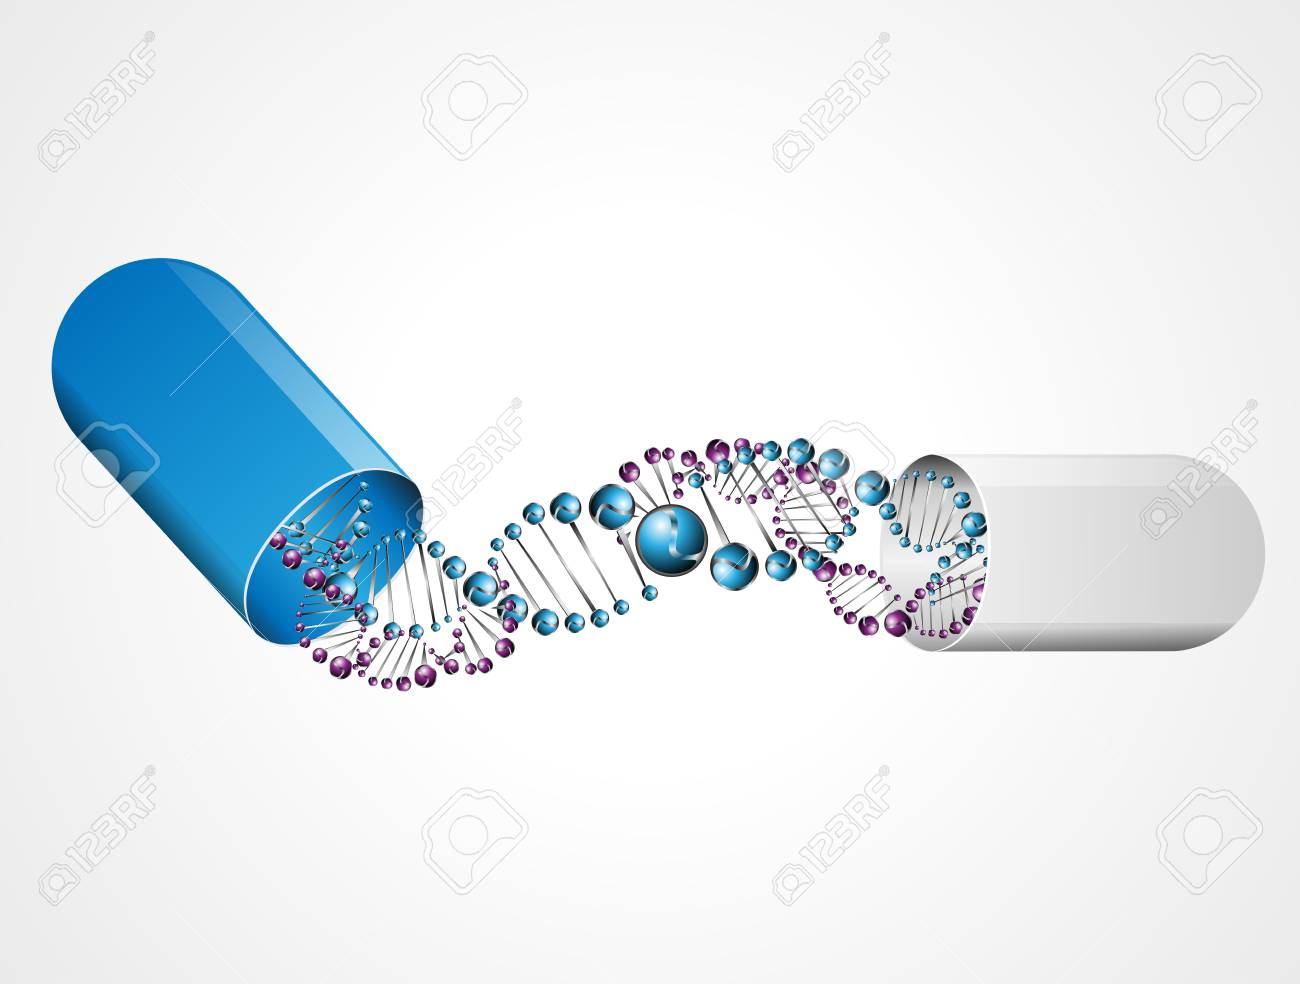

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

#Download and prepare the dataset for training

In [2]:
od.download('https://www.kaggle.com/c/bioresponse/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: happyonu
Your Kaggle Key: ··········


100%|██████████| 4.52M/4.52M [00:00<00:00, 18.5MB/s]


Extracting archive ./bioresponse/bioresponse.zip to ./bioresponse


In [3]:
data_dir = './bioresponse'

In [4]:
import os

In [5]:
os.listdir(data_dir)

['svm_benchmark.csv', 'train.csv', 'test.csv']

In [6]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [7]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'./bioresponse/train.csv'

In [8]:
train_df = pd.read_csv('./bioresponse/train.csv')
test_df = pd.read_csv('./bioresponse/test.csv')

In [9]:
train_df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,...,D1677,D1678,D1679,D1680,D1681,D1682,D1683,D1684,D1685,D1686,D1687,D1688,D1689,D1690,D1691,D1692,D1693,D1694,D1695,D1696,D1697,D1698,D1699,D1700,D1701,D1702,D1703,D1704,D1705,D1706,D1707,D1708,D1709,D1710,D1711,D1712,D1713,D1714,D1715,D1716,D1717,D1718,D1719,D1720,D1721,D1722,D1723,D1724,D1725,D1726,D1727,D1728,D1729,D1730,D1731,D1732,D1733,D1734,D1735,D1736,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,0.000000,0.0,0.0,0.000000,0.092000,0.057300,0.426576,0.234822,0.050200,0.000000,0.833333,0,1.000000,0.121520,0.000000,0.000000,0.000000,0.035100,0.133438,0.0,0.000000,0.011700,0.000000,0.000000,0.000000,0.034600,0.027100,0.361513,0.000000,0.075300,0.611301,0.000000,0,0.263109,0.189941,0.000000,0.083500,0.166667,0.01350,0.285714,0.015700,0.0,0.00,0.222222,0.045500,0.0000,0.027800,0.307537,0.069400,0.604357,0.340425,0.451980,0.000000,0.047600,0,0.000335,0.066700,0.000000,0.0,0.599647,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,0.000000,0.0,0.0,0.199919,0.312883,0.276016,0.647681,0.286386,0.324514,0.156568,1.000000,0,0.578947,0.268620,0.063400,0.190839,0.000000,0.368455,0.191837,0.0,0.068900,0.175271,0.281710,0.254301,0.000000,0.362117,0.161739,0.161839,0.051000,0.268761,0.806448,0.264825,0,0.000000,0.280782,0.187546,0.282772,0.333333,0.07430,0.428571,0.153405,0.0,0.00,0.555556,0.180608,0.0209,0.154395,0.433171,0.295090,0.454201,0.316492,0.313217,0.052600,0.000000,1,0.017800,0.366667,0.105263,0.4,0.671557,...,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,0.000000,0.0,0.0,0.066600,0.000000,0.079100,0.298171,0.212155,0.051200,0.000000,0.750000,1,1.000000,0.000000,0.021100,0.063900,0.000000,0.017600,0.000000,0.0,0.027500,0.070900,0.071800,0.000000,0.000000,0.017300,0.000000,0.156408,0.069700,0.024700,0.517376,0.074500,0,0.000000,0.153632,0.039600,0.031900,0.000000,0.00676,0.285714,0.000000,0.0,0.00,0.111111,0.022700,0.0000,0.009880,0.351472,0.048400,0.608789,0.342316,0.466053,0.052600,0.047600,0,0.000069,0.066700,0.000000,0.0,0.500745,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [11]:
n_rows = len(train_df)
n_rows

3751

In [12]:
n_cols = len(train_df.columns)
n_cols

1777

In [13]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 3751 rows and 1777 columns.


In [14]:
!pip install plotly matplotlib seaborn --quiet

In [15]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [17]:
train_df.Activity.describe()

count    3751.000000
mean        0.542255
std         0.498278
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Activity, dtype: float64

#Find Distribution of the labels

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



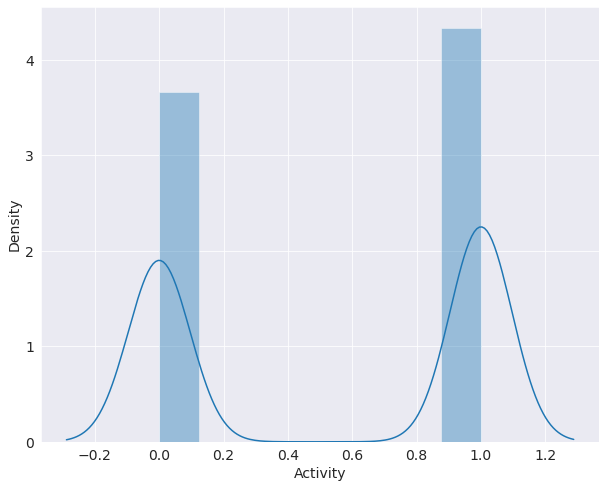

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(train_df.Activity, kde=True);

# Prepare the Dataset for Training

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [20]:
train_df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,...,D1677,D1678,D1679,D1680,D1681,D1682,D1683,D1684,D1685,D1686,D1687,D1688,D1689,D1690,D1691,D1692,D1693,D1694,D1695,D1696,D1697,D1698,D1699,D1700,D1701,D1702,D1703,D1704,D1705,D1706,D1707,D1708,D1709,D1710,D1711,D1712,D1713,D1714,D1715,D1716,D1717,D1718,D1719,D1720,D1721,D1722,D1723,D1724,D1725,D1726,D1727,D1728,D1729,D1730,D1731,D1732,D1733,D1734,D1735,D1736,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,0.000000,0.0,0.0,0.000000,0.092000,0.057300,0.426576,0.234822,0.050200,0.000000,0.833333,0,1.000000,0.121520,0.000000,0.000000,0.000000,0.035100,0.133438,0.0,0.000000,0.011700,0.000000,0.000000,0.000000,0.034600,0.027100,0.361513,0.000000,0.075300,0.611301,0.000000,0,0.263109,0.189941,0.000000,0.083500,0.166667,0.01350,0.285714,0.015700,0.0,0.00,0.222222,0.045500,0.0000,0.027800,0.307537,0.069400,0.604357,0.340425,0.451980,0.000000,0.047600,0,0.000335,0.066700,0.000000,0.0,0.599647,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,0.000000,0.0,0.0,0.199919,0.312883,0.276016,0.647681,0.286386,0.324514,0.156568,1.000000,0,0.578947,0.268620,0.063400,0.190839,0.000000,0.368455,0.191837,0.0,0.068900,0.175271,0.281710,0.254301,0.000000,0.362117,0.161739,0.161839,0.051000,0.268761,0.806448,0.264825,0,0.000000,0.280782,0.187546,0.282772,0.333333,0.07430,0.428571,0.153405,0.0,0.00,0.555556,0.180608,0.0209,0.154395,0.433171,0.295090,0.454201,0.316492,0.313217,0.052600,0.000000,1,0.017800,0.366667,0.105263,0.4,0.671557,...,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,0.000000,0.0,0.0,0.066600,0.000000,0.079100,0.298171,0.212155,0.051200,0.000000,0.750000,1,1.000000,0.000000,0.021100,0.063900,0.000000,0.017600,0.000000,0.0,0.027500,0.070900,0.071800,0.000000,0.000000,0.017300,0.000000,0.156408,0.069700,0.024700,0.517376,0.074500,0,0.000000,0.153632,0.039600,0.031900,0.000000,0.00676,0.285714,0.000000,0.0,0.00,0.111111,0.022700,0.0000,0.009880,0.351472,0.048400,0.608789,0.342316,0.466053,0.052600,0.047600,0,0.000069,0.066700,0.000000,0.0,0.500745,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# now we have split data

In [21]:
x_train = train_df[train_df.columns.drop('Activity')]
x_train

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,...,D1677,D1678,D1679,D1680,D1681,D1682,D1683,D1684,D1685,D1686,D1687,D1688,D1689,D1690,D1691,D1692,D1693,D1694,D1695,D1696,D1697,D1698,D1699,D1700,D1701,D1702,D1703,D1704,D1705,D1706,D1707,D1708,D1709,D1710,D1711,D1712,D1713,D1714,D1715,D1716,D1717,D1718,D1719,D1720,D1721,D1722,D1723,D1724,D1725,D1726,D1727,D1728,D1729,D1730,D1731,D1732,D1733,D1734,D1735,D1736,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,0.000000,0.0,0.0,0.000000,0.092000,0.057300,0.426576,0.234822,0.050200,0.000000,0.833333,0,1.000000,0.121520,0.000000,0.000000,0.000000,0.035100,0.133438,0.0,0.000000,0.011700,0.000000,0.000000,0.000000,0.034600,0.027100,0.361513,0.000000,0.075300,0.611301,0.000000,0,0.263109,0.189941,0.000000,0.083500,0.166667,0.01350,0.285714,0.015700,0.0,0.00,0.222222,0.045500,0.0000,0.027800,0.307537,0.069400,0.604357,0.340425,0.451980,0.000000,0.047600,0,0.000335,0.066700,0.000000,0.0,0.599647,0.378793,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,0.000000,0.0,0.0,0.199919,0.312883,0.276016,0.647681,0.286386,0.324514,0.156568,1.000000,0,0.578947,0.268620,0.063400,0.190839,0.000000,0.368455,0.191837,0.0,0.068900,0.175271,0.281710,0.254301,0.000000,0.362117,0.161739,0.161839,0.051000,0.268761,0.806448,0.264825,0,0.000000,0.280782,0.187546,0.282772,0.333333,0.07430,0.428571,0.153405,0.0,0.00,0.555556,0.180608,0.0209,0.154395,0.433171,0.295090,0.454201,0.316492,0.313217,0.052600,0.000000,1,0.017800,0.366667,0.105263,0.4,0.671557,0.795151,...,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,0.000000,0.0,0.0,0.066600,0.000000,0.079100,0.298171,0.212155,0.051200,0.000000,0.750000,1,1.000000,0.000000,0.021100,0.063900,0.000000,0.017600,0.000000,0.0,0.027500,0.070900,0.071800,0.000000,0.000000,0.017300,0.000000,0.156408,0.069700,0.024700,0.517376,0.074500,0,0.000000,0.153632,0.039600,0.031900,0.000000,0.00676,0.285714,0.000000,0.0,0.00,0.111111,0.022700,0.0000,0.009880,0.351472,0.048400,0.608789,0.342316,0.466053,0.052600,0.047600,0,0.000069,0.066700,0.000000,0.0,0.500745,0.469066,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
y_train= train_df["Activity"]

In [23]:
print('x_train: {}, y_train: {}'.format(x_train.shape, y_train.shape))

x_train: (3751, 1776), y_train: (3751,)


#Training the Model 

Here  we are traing Random Forest classifier model with our best hyperparameter.

In [24]:
model = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42)

In [25]:
%%time
model.fit(x_train, y_train)

CPU times: user 2.94 s, sys: 23.4 ms, total: 2.97 s
Wall time: 1.58 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
predicted_probs =  [[(index + 1), x[1]] for index, x in enumerate(model.predict_proba(test_df))]



# cross validation

Here we perform Cross validation on Randomforest to resample data for better accurecy of model.

In [27]:
model2 = StratifiedKFold(n_splits=5, random_state=None)

In [28]:
scores = cross_val_score(model, x_train, y_train, cv=model2,scoring='accuracy')

In [29]:
print('Accuracy: {}'.format(scores.mean()))

Accuracy: 0.7963160230803374


Making Predictions on the Test Set


In [30]:
test_pred = [['MoleculeId', 'PredictedProbability']]

In [31]:
test_pred.extend(predicted_probs)

In [32]:
test_pred[0:100]

[['MoleculeId', 'PredictedProbability'],
 [1, 0.81],
 [2, 0.84],
 [3, 0.58],
 [4, 0.96],
 [5, 0.26],
 [6, 0.62],
 [7, 0.96],
 [8, 0.71],
 [9, 0.93],
 [10, 0.49],
 [11, 0.33],
 [12, 0.72],
 [13, 0.78],
 [14, 0.46],
 [15, 0.39],
 [16, 0.14],
 [17, 0.27],
 [18, 0.22],
 [19, 0.38],
 [20, 0.86],
 [21, 0.21],
 [22, 0.86],
 [23, 0.9],
 [24, 0.89],
 [25, 0.81],
 [26, 0.53],
 [27, 0.1],
 [28, 0.32],
 [29, 0.15],
 [30, 0.52],
 [31, 0.38],
 [32, 0.19],
 [33, 0.7],
 [34, 0.38],
 [35, 0.42],
 [36, 0.88],
 [37, 0.76],
 [38, 0.66],
 [39, 0.85],
 [40, 0.92],
 [41, 0.45],
 [42, 0.1],
 [43, 0.62],
 [44, 0.91],
 [45, 0.04],
 [46, 0.31],
 [47, 0.77],
 [48, 0.54],
 [49, 0.93],
 [50, 0.66],
 [51, 0.81],
 [52, 0.12],
 [53, 0.65],
 [54, 0.2],
 [55, 0.09],
 [56, 0.82],
 [57, 0.97],
 [58, 0.93],
 [59, 0.96],
 [60, 0.66],
 [61, 0.73],
 [62, 0.87],
 [63, 0.35],
 [64, 0.08],
 [65, 0.48],
 [66, 0.5],
 [67, 0.41],
 [68, 0.3],
 [69, 0.35],
 [70, 0.42],
 [71, 0.82],
 [72, 0.8],
 [73, 0.89],
 [74, 0.83],
 [75, 0.25],
 

In [33]:
def save_submission(submission_data):
    print('data saved')
    np.savetxt('./bioresponse/submission.csv', submission_data, delimiter=',', fmt='%s')
    
save_submission(test_pred)

data saved


#Training the Model
Here we are traing Gradiat boosting classifier model with our best hyperparameter.

In [34]:
model3 = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [36]:
model3.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
predicted_probs2 =  [[(index + 1), x[1]] for index, x in enumerate(model3.predict_proba(test_df))]



# cross validation

Here we perform Cross validation on Gradient boot to resample data for better accurecy of model.

In [38]:
model2_ = StratifiedKFold(n_splits=5, random_state=None)

In [39]:
scores2 = cross_val_score(model3, x_train, y_train, cv=model2,scoring='accuracy')

In [40]:
print('Accuracy: {}'.format(scores2.mean()))

Accuracy: 0.784325965379494


In [41]:
test_pred = [['MoleculeId', 'PredictedProbability']]
test_pred.extend(predicted_probs2)
test_pred[0:100]

[['MoleculeId', 'PredictedProbability'],
 [1, 0.6403014348505714],
 [2, 0.9294280366354634],
 [3, 0.35593274750666093],
 [4, 0.8800887367264353],
 [5, 0.09514980173692507],
 [6, 0.6022396116642503],
 [7, 0.8377374640881962],
 [8, 0.6998834833487758],
 [9, 0.883399469998084],
 [10, 0.48499444266889546],
 [11, 0.2735011827157766],
 [12, 0.6527974047967569],
 [13, 0.7587607706902817],
 [14, 0.47117537345862015],
 [15, 0.23265170335830562],
 [16, 0.29161707498173384],
 [17, 0.1744521051080595],
 [18, 0.18564752262107936],
 [19, 0.2632621430754228],
 [20, 0.7227910635824499],
 [21, 0.21676186400737316],
 [22, 0.7939898688173456],
 [23, 0.6693746044524014],
 [24, 0.8636381064502817],
 [25, 0.9526605495383093],
 [26, 0.8071513594956117],
 [27, 0.1470608206920095],
 [28, 0.11786202273309379],
 [29, 0.15984782532375563],
 [30, 0.33768967054185034],
 [31, 0.1696178708060093],
 [32, 0.1277819726917859],
 [33, 0.8138168291508734],
 [34, 0.3387309245588457],
 [35, 0.3951695374531161],
 [36, 0.85889

In [42]:
def save_submission2(submission_data2):
    print('data saved')
    np.savetxt('./bioresponse/submission2.csv', submission_data2, delimiter=',', fmt='%s')
    
save_submission2(test_pred)

data saved
